In [2]:
import pathlib
path=str(pathlib.Path().resolve().parent)+"/imagenes/"

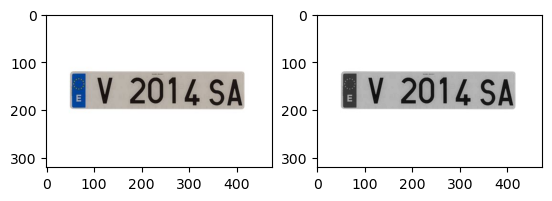

In [4]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread(path+"matricula.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
fig,ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(gray,cmap="gray")

La idea es que cada letra/número lo detecte independientemente

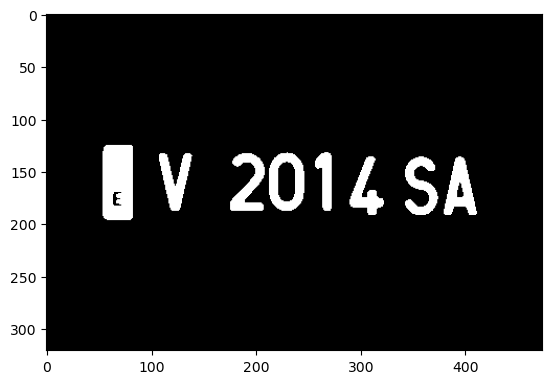

In [13]:
blur = cv.GaussianBlur(gray,(7,7),sigmaX=0,sigmaY=0)
_,th = cv.threshold(blur,127,255,cv.THRESH_BINARY_INV)
plt.imshow(th,cmap="gray")

In [26]:
# CONECIVIDAD PUEDE SER 4 O 8 DEPENDIENDO DE LOS LADOS
# OCHO AÑADE LAS ESQUINAS TMN
from cv2 import CV_32S
import numpy as np

analisis = cv.connectedComponents(th,connectivity=4,ltype=CV_32S)

total,labels_ids,values,centroide = analisis
salida = np.zeros(gray.shape,dtype="uint8")
cp = img.copy()

for i in range(total):
    area = values[1,cv.CC_STAT_AREA]
    x1 = values[1,cv.CC_STAT_LEFT]
    y1 = values[1,cv.CC_STAT_TOP]
    w = values[1,cv.CC_STAT_WIDTH]
    h = values[1,cv.CC_STAT_HEIGHT]